In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, show, subplot, title, get_cmap, hist
import numpy as np
from PIL import Image, ImageOps, ImageChops
import cv2

#Inline Matplot graphics into the notebook
%matplotlib inline 

#Ideas taken from https://auth0.com/blog/image-processing-in-python-with-pillow/
imgPath = '../gear_images/hardshell_jackets/111417.jpeg'
image = Image.open(imgPath)


Format: JPEG
Mode: RGB
Size: (176, 230)


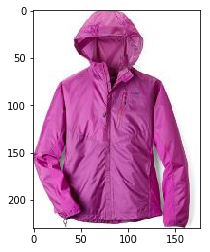

In [2]:
imshow(np.asarray(image))

# The file format of the source file.
print('Format: {}'.format(image.format))

# The pixel format used by the image. Typical values are “1”, “L”, “RGB”, or “CMYK.”
print('Mode: {}'.format(image.mode)) 

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print('Size: {}'.format(image.size))

In [3]:
# From: https://gist.github.com/fabeat/6621507
# Using the version in the comments to the Gist
# Best practice default is using Bicubic rather than Antialias per http://pillow.readthedocs.io/en/3.0.x/releasenotes/2.7.0.html#default-filter-for-thumbnails
def scale(image, max_size=(128,128), method=Image.BICUBIC):
    """
    resize 'image' to 'max_size' keeping the aspect ratio
    and place it in center of white 'max_size' image
    """
    image.thumbnail(max_size, method)
    offset = (int((max_size[0] - image.size[0]) // 2), int((max_size[1] - image.size[1]) // 2))
    back = Image.new("RGB", max_size, "white")
    back.paste(image, offset)

    return back

Image Size: (128, 128)
Numpy Shape: (128, 128, 3)


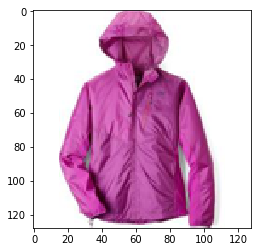

In [4]:
square = scale(image)
# Image size, in pixels. The size is given as a 2-tuple (width, height).
print('Image Size: {}'.format(square.size))
print('Numpy Shape: {}'.format(np.asarray(square).shape))
imshow(np.asarray(square))

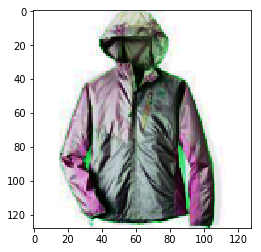

In [5]:
equalized = ImageOps.equalize(square)
imshow(np.asarray(equalized))

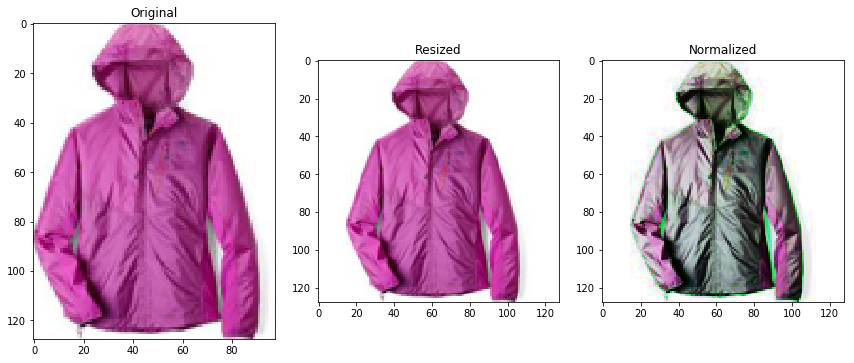

In [6]:
# Show the three images side by side
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.title('Original')
plt.imshow(image)

plt.subplot(132)
plt.title('Resized')
plt.imshow(square)

plt.subplot(133)
plt.title('Normalized')
plt.imshow(equalized)

plt.tight_layout()
plt.show()

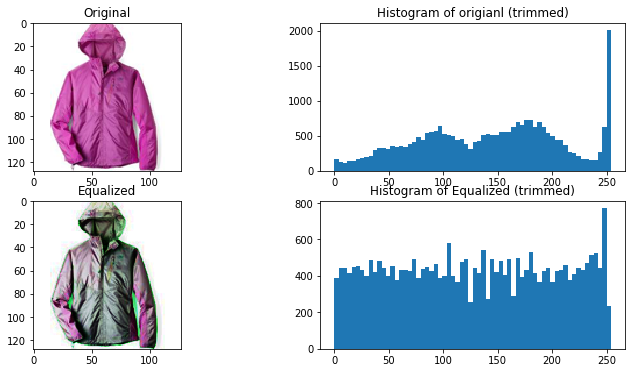

In [7]:
#Note: I am trimming the histogram range to drop the white (255) values as the skew blows out the chart.
plt.figure(figsize=(12,6))
plt.subplot(221); imshow(square, cmap=get_cmap('gray')); title('Original')
subplot(222); hist(np.asarray(square).flatten(), 64, range=(0,254)); title('Histogram of origianl (trimmed)')
subplot(223); imshow(equalized, cmap=get_cmap('gray'));  title('Equalized')
subplot(224); hist(np.asarray(equalized).flatten(), 64, range=(0,254)); title('Histogram of Equalized (trimmed)')

show()


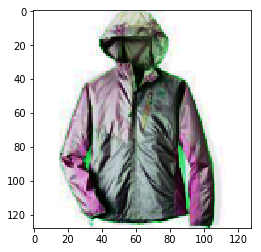

In [8]:
#Putting it all together into a single function
def PrePrcessImage(file_path):
    image = Image.open(imgPath)
    square = scale(image)
    equalized = ImageOps.equalize(square)
    return equalized

imshow(PrePrcessImage(imgPath))